



```
# Project Name: Clean Air Delivery Rate (CADR) calculator: Integral method and log-linear regression method
# Version: 1.0.0
# Developed by: Saman Haratian
# Contact: sharatian@iit.edu
# Copyright © 2025 Built Environment Research Groap (BERG) at Illinois Institute of Technology.
# This code is licensed for personal or academic use only.
# Redistribution, modification, or commercial use requires prior written permission.
```




This code is designed to evaluate the Equivalent Clean Air (ECA) flow rate, also known as the Clean Air Delivery Rate (CADR) from time-resolved pollutant concentration data resulting from pulse injection and decay tests (i.e., pull down tests) using two different approaches: the integral method and the log-linear regression method.


***Log-linear regression method***

This method commonly involves comparing first-order loss rate constants between the two test conditions and multiplying the difference by the volume of the room.

***Integral method***

This method quantifies loss rates and CADR from time-resolved contaminant concentration data resulting from pulse injection and decay tests of air cleaning devices, which does not rely on conventional first-order assumptions and cab be applied on any concentration dataset.

As a first step, the following Python libraries are imported to perform the necessary calculations

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
#from scipy.stats import wilcoxon

Next, we import all time-series concentrations from individual test cases along with any corresponding measurment errors, either manually or through importing an external file. For each example herein, time-series concentration data are manually input as an array.

Eight (8) case study examples are explored here:

*   Case #1: Ideal first order

*   Case #2: Real non-biological particles: Smoke [link](https://built-envi.com/wp-content/uploads/IIT-CADR-Testing-WINIX-5500-2-October-2021.pdf).
*   Case #3: High res. VOC (formaldehyde) by Schumacher [doi](https://doi.org/10.3390/atmos15010109)

*   Case #4: Low res. VOC (formaldehyde) by Law et al. [doi](https://doi.org/10.1016/j.buildenv.2024.111823)

*   Case #5-7: Bacteriophage MS2 by Ratliff et al. [doi](https://doi.org/10.1016/j.buildenv.2022.109804)

*   Case #8: UVGI test by Lin et al. [doi](https://doi.org/10.1080/02786826.2017.1280128)


For each test case data set, variable names and conventions are as follows:


1. Define time-point arrays for control and test experiments under `t_control` and `t_test`. The default unit is in minutes. If you time-poins are not in minutes, please convert it to minutes

2. Define concentration arrays for control and test experiments under `c_control` and `c_test`.

3. Define backgound concentration arrays for control and test experiemtn under `c_bg_control` and `c_bg_test`

4. Define uncertainty arrays for control and test experiments under `sigma_control` and `sigma_test` which simply represents the unceratinty associated with each measurement

Note that


1.   The units for all concentrations can be arbitrary, as the log-linear regression method is based on loss rates, which are independent of concentration units. In the integral method, the concentration units cancel out, resulting in a value with the same units as the loss rate.
2.   The unit of CADR is either CFM or m³/min, depending on the unit of volume used in the calculations.




# ***Case #1: Ideal  first order***

In [3]:
t_control = np.array([0, 15, 30, 60, 90, 120])                                  # Time points (min)
t_test = np.array([0, 15, 30, 60, 90, 120])                                     # Time points (min)

c_test = np.array([ 8.00E+10, 2.29E+10, 6.57E+09,
                   5.39E+08, 4.42E+07, 3.63E+06])                               # Test concentrations (PFU/m3)
c_control = np.array([8.00E+10, 4.28E+10, 2.29E+10,
                      6.57E+09, 1.88E+09, 5.39E+08])                            # Control concentrations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

sigma_test = np.array([0,0,0,0,0,0])                                            # Test standard deviations (Ideal hypothetical first order)(PFU/m3)
sigma_control = np.array([0,0,0,0,0,0])                                         # Control standard deviations (Ideal hypothetical first order)(PFU/m3)

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)




# ***Case #2: Real non-biological particles: Smoke (Truncated dataset)***

In [61]:
t_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points (min)

t_control = np.array([0, 1,	2, 3,	4, 5,	6, 7, 8, 9, 10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,	21])                    # Time points (min)


c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (#/cm3)

c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036])                                    # Test concentrations (#/cm3)

sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])         # Test standard deviations (#/cm3)

sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0.])   # Control standard deviations (#/cm3)

sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

c_bg_test=113.7572667                                                           # Test background concentration (#/cm3)
c_bg_control=607.22006143                                                       # Control background concentration (#/cm3)

V = 1296.048                                                                    # Chamber volume (ft3)
#V = 36.7                                                                       # Chamber volume (m3)

# ***Case #2: Real non-biological particles: Smoke (full dataset)***

In [60]:
t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,	11,	12,	13,	14,	15,
                16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28,	29,	30,	31,
                32,	33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,
                48,	49,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59])                # Time points (min)

t_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points (min)

c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036,	18965.1773,	17917.88,	16800.8839,
                   17120.304,	15590.7547,	15133.0791,	14335.7846,	14481.8507,
                   13082.9319,	13615.1729,	12671.266,	12284.8735,	12212.7403,
                   10803.6982,	10626.2898,	9913.9165,	9592.189,	9748.4621,
                   9832.5099,	8845.3218,	8723.0745,	8549.6231,	7938.6471,
                   7994.5961,	7957.8449,	7420.9003,	7394.3616,	6939.229,
                   6480.9155,	6413.2256,	6032.8,	6506.7329,	5738.9208,
                   5651.0126,	5511.8419,	5562.7665,	5061.1998,	5221.2187])   # Test concentrations (#/cm3)

c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (#/cm3)

sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0.,0., 0., 0., 0., 0., 0., 0., 0., 0.])               # Control standard deviations (#/cm3)


sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])



c_bg_test=113.7572667                                                           # Test background concentration (#/cm3)
c_bg_control=607.22006143                                                       # Test background concentration (#/cm3)

V = 1296.048                                                                    # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)

# ***Case #3: Real VOC (High Resolution) from 0 to 20 minutes (Schumacher et. al. 2024)***

In [71]:
t_test = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points (min)
t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points (min)

c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78])                                                    # test concentrations (ppb)
c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03])                                                # Control concentrations (ppb)

sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                        # Test standard deviations (ppb)
sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                      # Test standard deviations (ppb)

c_bg_test=0                                                                     # Test background concentration (ppb)
c_bg_control=0                                                                  # Control background concentration (ppb)

V = 1034.72                                                                     # Chamber volume (ft3)
#V = 29.3                                                                       # Chamber volume (m3)

# ***Case #3: Real VOC (High Resolution) (Schumacher et. al. 2024)***

In [ ]:
# full dataset

t_test = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points (min)

t_control = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points (min)


c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78, 61.08, 55.48, 51.09, 47.80, 43.67, 38.95, 35.24,
32.66, 30.53, 28.45, 26.76, 27.44, 29.12, 23.70, 24.67, 21.88, 19.60, 18.40,
17.51, 19.38, 19.07, 16.17, 14.67, 13.91, 13.55, 12.91, 12.21, 11.86, 12.43,
12.45, 12.32, 11.57, 11.21, 11.55, 10.61, 10.93, 11.39, 11.73, 11.32, 11.30 ])  # Test concentrations (ppb)


c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03, 866.09, 874.08, 864.19, 880.57, 872.92, 861.04,
856.26, 862.26, 863.67, 843.84, 844.73, 842.50, 838.72, 844.15, 843.70, 855.47,
834.44, 830.98, 823.93, 822.37, 825.25, 848.16, 812.26, 885.45, 863.72, 826.80,
833.43, 822.13, 809.45, 806.02, 800.97, 801.26, 795.55, 836.46, 827.70, 785.76,
786.31, 786.06, 851.69, 837.34])                                                # Control concentrations (ppb)

sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0])                                                      # Test standard deviations (ppb)


sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0])                                                    # Control standard deviations (ppb)

c_bg_test=  0                                                                   # Background concentration (ppb)
c_bg_control=0                                                                  # Background concentration (ppb)


V = 1034.72                                                                     # Chamber volume (ft3)
#V = 29.3                                                                       # Chamber volume (m3)

# ***Case #4: Law et al 2024 (truncated dataset)***

In [84]:
#0-40 minutes for control and 0-25 minutes for test

t_test = np.array([0, 5, 10, 15, 20, 25])                                       # Time points (min)
t_control = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40 ])                       # Time points (min)


c_test = np.array([0.958783047,	0.502557891,	0.40034575,
                   0.332838565,	0.301776099,	0.272451193])                     # Test concentrations (mg/m3)

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718])                                             # Control concentrations (mg/m3)

sigma_test = np.array([0, 0, 0, 0, 0, 0 ])                                      # Test standard deviations (mg/m3)
sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])                           # Control standard deviations (mg/m3)


c_bg_test=0.24                                                                  # Test background concentration (mg/m3)
c_bg_control=0.65                                                               # Control background concentration (mg/m3)


V = 1059.44174                                                                  # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)




# ***Case #4: Law et al 2024 (Full datset)***

In [83]:
#0-60 minutes dataset (full dataset)

t_test = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])           # Time points (min)
t_control = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])        # Time points (min)

c_test = np.array([0.958783047, 0.502557891, 0.40034575, 0.332838565,
                   0.301776099, 0.272451193, 0.272625169, 0.251974851,
                   0.262558772, 0.262730546, 0.252494577, 0.252666351,
                   0.24242818 ])                                                # Test concentrations (mg/m3)

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718, 0.910021252, 0.910193026, 0.899954854,
                      0.901861986])                                             # Control concentrations (mg/m3)

sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])               # Control standard deviations (mg/m3)
sigma_test    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ])              # Test standard deviations (mg/m3)


c_bg_test=0.24                                                                  # Test background concentration (mg/m3)
c_bg_control=0.65                                                               # Control background concentration (mg/m3)

V = 1059.44174                                                                  # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)

# ***Case #5: Ratliff et al BPI***

In [4]:
t_control = np.array([0, 15, 30, 60, 90 ,120 ])                                 # Time points (min)
t_test = np.array([0, 15, 30, 60, 90 ,120 ])                                    # Time points (min)

c_test = 10**np.array([8.4619, 7.6279, 7.2164, 6.2079, 5.8852, 5.6428 ])        # Test concentrations (PFU/m3)
c_control =  10**np.array([8.4675, 7.6846, 7.1637, 7.0866, 6.2116, 6.1040])     # Control concentrations (PFU/m3)


sigma_test =  10**np.array([7.530323742, 6.865654317, 6.617901538,
                            5.922693902, 5.870458829, 5.382987778])             # Test standard deviations (PFU/m3)
sigma_control =  10**np.array([7.534758077, 7.341206607, 6.445473423,
                               6.37830487, 5.659000485, 5.391175913])           # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)


V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# ***Case #6: Ratliff et al PCO1***

In [107]:
#Notice: All concentrations were originally in logarithmic scale;
#here, we convert them back to a numeric (linear) scale.

t_control = np.array([0, 15, 30, 60, 90])                                       # Time points (min)
t_test = np.array([0, 15, 30, 60, 90])                                          # Time points (min)

c_test = 10**np.array([8.11212724060371, 7.589987734, 6.745802232,
                       6.013936402, 5.394571206 ])                              # Test concentrations (PFU/m3)
c_control = 10**np.array([8.46745953764963, 7.684595602, 7.163725729,
                          7.086631702, 6.211568868])                            # Control concentrations (PFU/m3)


sigma_test = 10**np.array([7.178489428, 7.114438699, 5.939398725,
                           5.094396243, 4.545973627])                           # Test standard deviations (PFU/m3)

sigma_control = 10**np.array([7.534758077, 7.341206607, 6.445473423,
                              6.37830487, 5.659000485])                         # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# ***Case #7: Ratliff et al PCO2***

In [111]:
t_control = np.array([0, 15, 30, 60, 90])                                       # Time points (min)
t_test = np.array([0, 15, 30, 60, 90])                                          # Time points (min)

c_test = 10**np.array([8.032891171, 7.087704857, 6.424694684,
                   5.320557829, 4.709637767])                                   # Test concentrations (PFU/m3)
c_control = 10**np.array([8.467459538, 7.684595602, 7.163725729,
                      7.086631702, 6.211568868])                                # Control concentrations (PFU/m3)

sigma_test = 10**np.array([6.981061496, 6.122931736, 5.667663947,
                           4.418605606, 3.820592639])                           # Test standard deviations (PFU/m3)
sigma_control =  10**np.array([ 7.534758077, 7.341206607, 6.445473423,
                               6.37830487, 5.659000485])                        # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (mg/m3)
c_bg_control=0                                                                  # Control background concentration (mg/m3)

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# Case #8: Lin et al 2017

In [116]:
t_control = np.array([0, 10, 20, 30])                                           # Time points (secs)
t_control =  t_control/60                                                       # Time points (mins)

t_test = np.array([0, 10, 20, 30])                                              # Time points (secs)
t_test =  t_test/60                                                             # Time points (mins)

sf=np.array([1, 0.035, 0.023, 0.022])                                           # Survival fraction

c_test1 = np.array([177.8, 5.5, 3, 2])                                          # Test concentrations (PFU/L)
c_test = c_test1*1000                                                           # Test concentrations (PFU/m3)

c_control1 = c_test1/sf                                                         # Test concentrations (PFU/m3)
c_control = c_control1*1000



sigma_test    = np.array([0, 0, 0, 0 ])                                         # Test standard deviations (PFU/m3)
sigma_control = np.array([0, 0, 0, 0 ])                                         # Control standard deviations (PFU/m3)

c_bg_test=0                                                                     # Test background concentration (PFU/m3)
c_bg_control=0                                                                  # Control background concentration (PFU/m3)

V = 206                                                                         # Chamber volume (ft3)
#V = 5.8                                                                        # Chamber volume (m3)


# **Monte Carlo Analysis**


## 1.First-order decay method:


### 1.1 ECA using log-linrear Regression Method

The loss rate is calculated based on the following formula

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <p>
    \begin{equation}
    K = \frac{\sum_{i=0}^{np} t_i \ln\left(\frac{C_i - C_{bg}}{C_0 - C_{bg}}\right)}{\sum_{i=0}^{np} t_i^2} \tag{1}
    \end{equation}
    
  </p>
</body>
</html>


Then, loss rates will be plugged into the CADR formula to obtain value for CADR

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <p>
    \begin{equation}
    CADR = V(K_{\text{Test}} - K_{\text{Control}}) \tag{2}
    \end{equation}
    
  </p>
</body>
</html>


Nominal CADR = 34.24 CFM

Mean CADR value from Monte Carlo simulations = 35.29 CFM



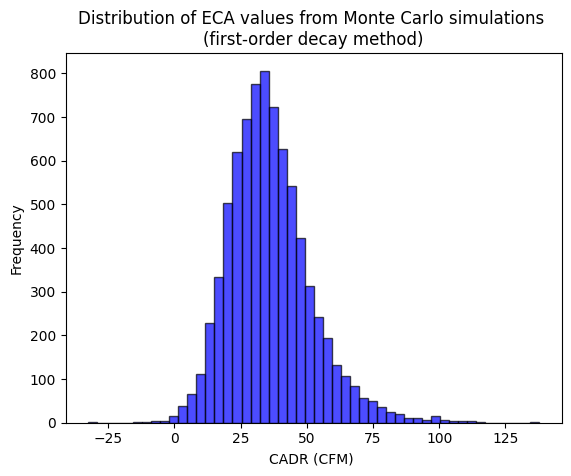

In [9]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_simulations = 10000                                                         # Numbner of MC simulation

################# Loss rate calculator function (Equation 1) ###################

def Loss_Rate(t, c, c_bg):

    ln_c_ratio = -np.log((c-c_bg) / (c[0]-c_bg))
    numerator = np.sum((t * ln_c_ratio) )
    denominator = np.sum((t ** 2) )

    return (numerator / denominator)

################################### Nominal CADR ###############################
'''
Difinition: The nominal CADR is a CADR calculated directly using provided values
from experiment, not from MC Simulation
'''
Nominal_CADR = V * (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))
print(f"Nominal CADR = {Nominal_CADR:.2f}","CFM\n")


######################### Monte Carlo simulations ##############################

CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):
    c_test_simulated = np.random.normal((c_test), (sigma_test))
    c_control_simulated = np.random.normal((c_control),(sigma_control))

    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) -
                          Loss_Rate(t_control, c_control_simulated, c_bg_control))

# Calculate mean and standard deviation of CADR

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: if output distribution is not normal, one can eleminate n% percentile of
data from output distribution. One can readily detect non-normal distribution by
either comparing nominal CADR to MC CADR, or visual inspection of the output plot.
By eleminating n% of the data from both sided, the MC CADR will gradually
converges to nominal distribution. data eamination however, can results in
significant change in MC SD if uses unwiselly. Therefore, in this code,
it is fixed to be 5% for all simualtion
'''

n=5 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])

print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean:.2f}","CFM\n")

################################### Plotting ###################################
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of ECA values from Monte Carlo simulations \n(first-order decay method)')
plt.xlabel('CADR (CFM) ')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


###1.2. log linear error



Uncertainty prpagation for log-linear approach:

Linear regression was used to estimate the slope through the straight line using the follwoing formula:
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Regression Coefficient</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    K_{\text{reg}} = - \frac{\sum_{i=1}^{n} t_i \ln\left(\frac{C(t_i)}{C(0)}\right)}{\sum_{i=1}^{n} t_i^2}
    \tag{3}
    \end{equation}
  </div>
</body>
</html>


We also know that the error of regression can be obtained using:
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Error Formula</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    \delta = \sqrt{\frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{(n-1) \sum_{i=1}^{n} x_i^2}}
    \tag{4}
    \end{equation}
  </div>
</body>
</html>


Based on the aformentioned formula, the regression error in the resulting loss rate is thus


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Uncertainty in K_reg</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    \delta K_{\text{reg}} =
    \sqrt{
      \frac{
        \sum_{i=1}^{n} \left( \ln\left(\frac{C(t_i)}{C(0)}\right)
        - t_i \frac{ \sum_{i=1}^{n} t_i \ln\left(\frac{C(t_i)}{C(0)}\right) }{ \sum_{i=1}^{n} t_i^2 }
        \right)^2
      }{
        (n-1) \sum_{i=1}^{n} t_i^2
      }
    }
    \tag{5}
    \end{equation}
  </div>
</body>
</html>


By applying MC method on both $K_{\text{reg}}$ and $\delta K_{\text{reg}}$ we obtain:


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Mean and Standard Deviation</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    K_{\text{reg}} = \bar{K}_{\text{reg}} \pm \sigma_{K_{\text{reg}}}
    \tag{6}
    \end{equation}
  </div>
</body>
</html>
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Uncertainty in K_reg</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    \delta K_{\text{reg}} = (\delta K_{\text{reg}} \pm \sigma_{\delta K_{\text{reg}}})
    \tag{7}
    \end{equation}
  </div>
</body>
</html>
 which can be compined as follows ang results in total error or log-linear approach

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Combined K Formula</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    K = \bar{K}_{\text{reg}} \pm \sigma_{K_{\text{reg}}} \pm (\delta K_{\text{reg}} \pm \sigma_{\delta K_{\text{reg}}})
    \tag{8}
    \end{equation}
  </div>
</body>
</html>


The overall error for ECA is calculated using equation 9"
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Combined K Formula</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      TeX: {
        equationNumbers: { autoNumber: "AMS" },
        extensions: ["AMSmath.js", "AMSsymbols.js"]
      },
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['\\[','\\]'], ['$$','$$']]
      }
    });
  </script>
</head>
<body>
  <div class="formula">
    \begin{equation}
    \delta_{ECA} = V×\sqrt {(E_{K_{reg,test}})^2+(E_{K_{reg,control}})^2}
    \tag{9}
    \end{equation}
  </div>
</body>
</html>



Mean K_reg value for test from Monte Carlo simulations = 0.0645

Standard deviation of K_reg value for test from Monte Carlo simulations = 0.0035

Mean K_reg value for control from Monte Carlo simulations = 0.0527

Standard deviation of K_reg value for control from Monte Carlo simulations = 0.0016

Mean δK_reg value for test from Monte Carlo simulations = 0.0066

Standard deviation of δK_reg value for test from Monte Carlo simulations = 0.0012

Mean δK_reg value for control from Monte Carlo simulations = 0.0057

Standard deviation of δK_reg value for control from Monte Carlo simulations = 0.0008

Overall error for kt: 0.011295905557831323
Overall error for kc: 0.008087309153851224
Overall uncertainty for log-linear: 41.67755349696876


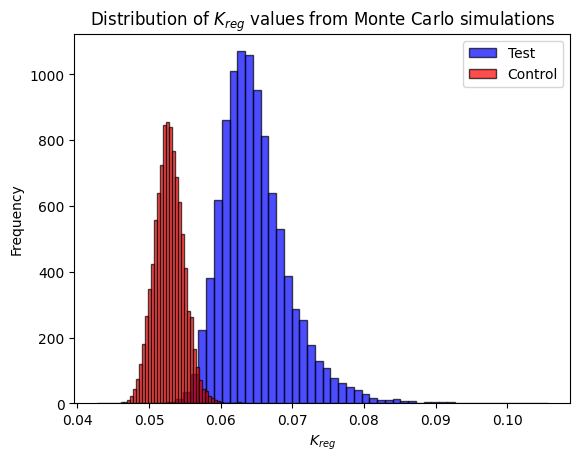

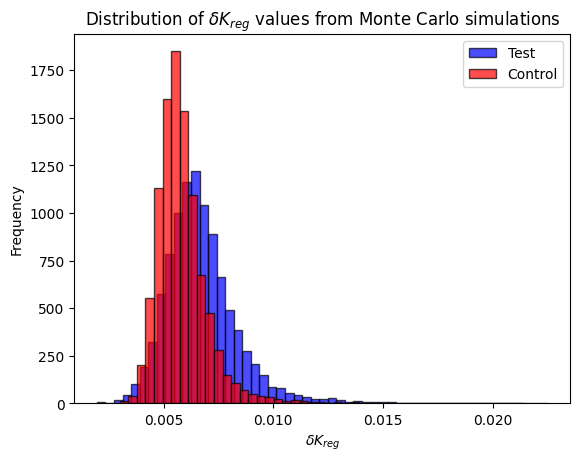

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 10000

###########################  Loss Rate Calculation  ############################
# Calculates loss rate using Eq(3)
def K_reg(t, c, c_bg):
    ln_c_ratio = -np.log((c - c_bg) / (c[0] - c_bg))
    numerator = np.sum(t * ln_c_ratio)
    denominator = np.sum(t ** 2)
    return numerator / denominator

##############################  Regression Error  ##############################
# Calculates regression error using Eq(5)
def delta_K_reg(t, c, k, c_bg):
    ln_c_ratio = -np.log((c - c_bg) / (c[0] - c_bg))
    residual_sum = np.sum(((ln_c_ratio - k * t)) ** 2)
    return np.sqrt(residual_sum / ((len(t) - 1) * np.sum(t ** 2)))

# Initialize result arrays
K_reg_test = []
K_reg_control = []
delta_k_reg_test = []
delta_k_reg_control = []

# Monte Carlo simulations for K_reg

i = 0
while i < num_simulations:
    c_test_sim = np.random.normal(c_test, sigma_test)
    c_control_sim = np.random.normal(c_control, sigma_control)

    if np.any((c_test_sim - c_bg_test) <= 0) or (c_test_sim[0] - c_bg_test) <= 0:
        continue
    if np.any((c_control_sim - c_bg_control) <= 0) or (c_control_sim[0] - c_bg_control) <= 0:
        continue

    try:
        K_reg_test.append(K_reg(t_test, c_test_sim, c_bg_test))
        K_reg_control.append(K_reg(t_control, c_control_sim, c_bg_control))
        i += 1
    except:
        continue  # Skip samples that are not a numnumberner (NAN)

# Monte Carlo simulations for delta_K_reg
i = 0
while i < num_simulations:
    c_test_sim = np.random.normal(c_test, sigma_test)
    c_control_sim = np.random.normal(c_control, sigma_control)

    if np.any((c_test_sim - c_bg_test) <= 0) or (c_test_sim[0] - c_bg_test) <= 0:
        continue
    if np.any((c_control_sim - c_bg_control) <= 0) or (c_control_sim[0] - c_bg_control) <= 0:
        continue

    try:
        k_test = K_reg(t_test, c_test_sim, c_bg_test)
        k_control = K_reg(t_control, c_control_sim, c_bg_control)
        delta_k_reg_test.append(delta_K_reg(t_test, c_test_sim, k_test, c_bg_test))
        delta_k_reg_control.append(delta_K_reg(t_control, c_control_sim, k_control, c_bg_control))
        i += 1
    except:
        continue  # Skip bad samples

# Convert to numpy arrays
K_reg_test = np.array(K_reg_test)
K_reg_control = np.array(K_reg_control)
delta_k_reg_test = np.array(delta_k_reg_test)
delta_k_reg_control = np.array(delta_k_reg_control)

'''
Notice: If the output distribution is not normal, one can eliminate n% of the
data from both ends of the distribution. Non-normality can be detected either
by comparing the nominal CADR to the Monte Carlo (MC) CADR or through visual
inspection of the output plot. By removing n% of the data from both sides, the
MC CADR will gradually converge toward the nominal distribution. However, data
trimming can result in significant changes to the MC standard deviation (MC SD)
if used unwisely. Therefore, in this code, the trimming percentage is fixed at
5% for all simulations.
'''

n=5 #percentile (%)

if np.all(sigma_test == 0) and np.all(sigma_control == 0):

  K_reg_mean_test = np.mean(K_reg_test)
  K_reg_std_test = np.std(K_reg_test)
  K_reg_mean_control = np.mean(K_reg_control)
  K_reg_std_control = np.std(K_reg_control)

  delta_k_reg_mean_test = np.mean(delta_k_reg_test)
  delta_k_reg_std_test = np.std(delta_k_reg_test)
  delta_k_reg_mean_control = np.mean(delta_k_reg_control)
  delta_k_reg_std_control = np.std(delta_k_reg_control)
else:

    K_reg_mean_test = np.mean(K_reg_test[(K_reg_test > np.percentile(K_reg_test, n)) & (K_reg_test < np.percentile(K_reg_test, 100-n))])
    K_reg_std_test = np.std(K_reg_test[(K_reg_test > np.percentile(K_reg_test, n)) & (K_reg_test < np.percentile(K_reg_test, 100-n))])
    K_reg_mean_control = np.mean(K_reg_control[(K_reg_control > np.percentile(K_reg_control, n)) & (K_reg_control < np.percentile(K_reg_control, 100-n))])
    K_reg_std_control = np.std(K_reg_control[(K_reg_control > np.percentile(K_reg_control, n)) & (K_reg_control < np.percentile(K_reg_control, 100-n))])

    delta_k_reg_mean_test = np.mean(delta_k_reg_test[(delta_k_reg_test > np.percentile(delta_k_reg_test, n)) & (delta_k_reg_test < np.percentile(delta_k_reg_test, 100-n))])
    delta_k_reg_std_test = np.std(delta_k_reg_test[(delta_k_reg_test > np.percentile(delta_k_reg_test, n)) & (delta_k_reg_test < np.percentile(delta_k_reg_test, 100-n))])
    delta_k_reg_mean_control = np.mean(delta_k_reg_control[(delta_k_reg_control > np.percentile(delta_k_reg_control, n)) & (delta_k_reg_control < np.percentile(delta_k_reg_control, 100-n))])
    delta_k_reg_std_control = np.std(delta_k_reg_control[(delta_k_reg_control > np.percentile(delta_k_reg_control, n)) & (delta_k_reg_control < np.percentile(delta_k_reg_control, 100-n))])



# Output results
print(f"Mean K_reg value for test from Monte Carlo simulations = {K_reg_mean_test:.4f}\n")
print(f"Standard deviation of K_reg value for test from Monte Carlo simulations = {K_reg_std_test:.4f}\n")
print(f"Mean K_reg value for control from Monte Carlo simulations = {K_reg_mean_control:.4f}\n")
print(f"Standard deviation of K_reg value for control from Monte Carlo simulations = {K_reg_std_control:.4f}\n")

print(f"Mean δK_reg value for test from Monte Carlo simulations = {delta_k_reg_mean_test:.4f}\n")
print(f"Standard deviation of δK_reg value for test from Monte Carlo simulations = {delta_k_reg_std_test:.4f}\n")
print(f"Mean δK_reg value for control from Monte Carlo simulations = {delta_k_reg_mean_control:.4f}\n")
print(f"Standard deviation of δK_reg value for control from Monte Carlo simulations = {delta_k_reg_std_control:.4f}\n")

overall_error_kt = K_reg_std_test + delta_k_reg_mean_test + delta_k_reg_std_test
overall_error_kc = K_reg_std_control + delta_k_reg_mean_control + delta_k_reg_std_control

print("Overall error for kt:", overall_error_kt)
print("Overall error for kc:", overall_error_kc)
print("Overall uncertainty for log-linear:", V * np.sqrt(overall_error_kt**2 + overall_error_kc**2))

# Plotting the distribution of k1 values
plt.hist(K_reg_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k1 Test')
plt.hist(K_reg_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k1 Control')
plt.title('Distribution of $K_{reg}$ values from Monte Carlo simulations')
plt.xlabel('$K_{reg}$')
plt.ylabel('Frequency')
plt.legend(['Test', 'Control'])
plt.show()

# Plotting the distribution of k2 values
plt.hist(delta_k_reg_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k2 Test')
plt.hist(delta_k_reg_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k2 Control')
plt.title('Distribution of $\delta K_{reg}$ values from Monte Carlo simulations')
plt.xlabel('$\delta K_{reg}$')
plt.ylabel('Frequency')
plt.legend(['Test', 'Control'])
plt.show()


## 2.Intergral approach






The CADR base on the integral method can be calculated as follows:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CADR Formula</title>
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
    </script>
    <script type="text/x-mathjax-config">
      MathJax.Hub.Config({
        TeX: {
          equationNumbers: { autoNumber: "AMS" },
          extensions: ["AMSmath.js", "AMSsymbols.js"]
        },
        tex2jax: {
          inlineMath: [['$','$'], ['\\(','\\)']],
          displayMath: [['\\[','\\]'], ['$$','$$']]
        }
      });
    </script>
</head>
<body>
    <div class="formula">
        \begin{equation}
        \text{CADR}_{\text{Integral}} = \frac{V(C_{\text{test}}(0)-C_{\text{last}})}{\int_{0}^{t_{\text{last}}} (C_{\text{test}}(t)-C_{bg, \text{test}}) \, dt}
        - \frac{V(C_{\text{control}}(0)-C_{\text{last}})}{\int_{0}^{t_{\text{last}}} (C_{\text{control}}(t)-C_{bg, \text{control}}) \, dt}
        \tag{11}
        \end{equation}
    </div>
</body>
</html>



 Where the integral in the denominator can be calculated using either trapezoidal or logarithmic trapezoidal method. here, we use logarithmic trapezoidal method which looks like the following:

 <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Integral Formula</title>
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
    </script>
    <script type="text/x-mathjax-config">
      MathJax.Hub.Config({
        TeX: {
          equationNumbers: { autoNumber: "AMS" },
          extensions: ["AMSmath.js", "AMSsymbols.js"]
        },
        tex2jax: {
          inlineMath: [['$','$'], ['\\(','\\)']],
          displayMath: [['\\[','\\]'], ['$$','$$']]
        }
      });
    </script>
</head>
<body>
    <div class="formula">
        \begin{equation}
        \int_{0}^{t_{\text{last}}} C(t) \, dt =
        \sum_{n=1}^{t_{\text{last}}} \left( \frac{t_i - t_{i-1}}{\ln\left( \frac{C(t_{i-1}) - C_{bg}}{C(t_i) - C_{bg}} \right)} \left( C(t_{i-1}) - C(t_i) \right) \right)
        \tag{12}
        \end{equation}
    </div>
</body>
</html>


###2.1. Log-Trapezoidal Method

test 0.11183915539670848
control 0.0953761433720592
Nominal CADR value (CFM) = 49.38903607394784

Mean CADR value from Monte Carlo simulations = 44.97178271119321

Standard deviation of CADR value from Monte Carlo simulations = 46.64565993209871

Error = 103.7220610791773%



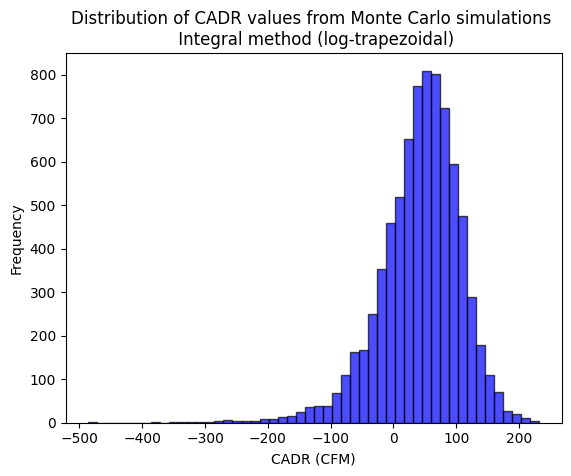

In [12]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_simulations = 10000

################## Log-Trapezoidal method (Equation12) #########################

def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        ln_c_ratio = np.log((c[i-1]-c_bg) / (c[i]-c_bg))
        #print(ln_c_ratio)
        c_diff = c[i-1] - c[i]
        integral_sum += (t_diff / ln_c_ratio) * c_diff

    return integral_sum

########Function to compute the CADR component for either test or control#######
def Loss_Rate(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (c[0]-c[-1]) / integral_c


# The following line calculates the CADR without considering errors, using only the provided centeral velues
CADR_nominal = V* (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))

print("test",Loss_Rate(t_test, c_test, c_bg_test))
print("control",Loss_Rate(t_control, c_control, c_bg_control))
print(f"Nominal CADR value (CFM) = {CADR_nominal}\n")

############################# Monte Carlo simulations###########################
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)
    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) - Loss_Rate(t_control, c_control_simulated, c_bg_control))

############## Calculate mean and standard deviation of MC CADR ################

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: If the output distribution is not normal, one can eliminate n% of the
data from both ends of the distribution. Non-normality can be detected either
by comparing the nominal CADR to the Monte Carlo (MC) CADR or through visual
inspection of the output plot. By removing n% of the data from both sides, the
MC CADR will gradually converge toward the nominal distribution. However, data
trimming can result in significant changes to the MC standard deviation (MC SD)
if used unwisely. Therefore, in this code, the trimming percentage is fixed at
5% for all simulations.
'''

n=5 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])


print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean}\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std}\n")
print(f"Error = {CADR_std / CADR_mean * 100}%\n")

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n Integral method (log-trapezoidal)')
plt.xlabel('CADR (CFM)')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()



###2.2. Trapezoidal Method

test 0.0887841843029807
control 0.07920965314974834
Nominal CADR value = 28.723593459697064

Mean CADR value from Monte Carlo simulations = 27.93095193568546

Standard deviation of CADR value from Monte Carlo simulations = 23.69901121232878

Error = 84.84856250835541%



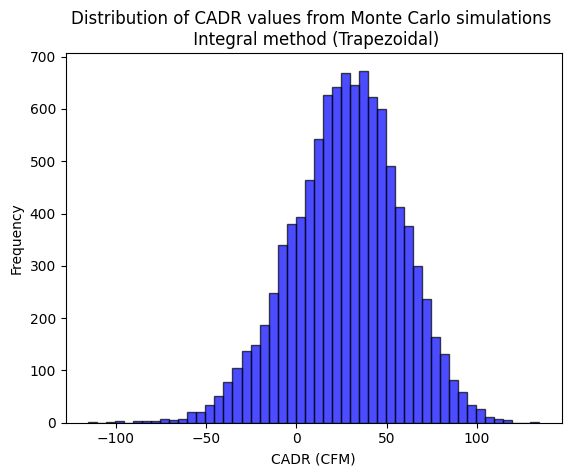

In [13]:
import numpy as np
import matplotlib.pyplot as plt


num_simulations = 10000

################################ Trapezoidal method ############################
def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        c_sum = c[i-1] + c[i]
        integral_sum += (t_diff * c_sum) / 2

    return integral_sum

########Function to compute the CADR component for either test or control#######
def Loss_Rate(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (c[0]-c[-1]) / integral_c


# The following line calculates the CADR without considering errors, using only the provided centeral velues
CADR_nominal = V* (Loss_Rate(t_test, c_test, c_bg_test) - Loss_Rate(t_control, c_control, c_bg_control))

print("test",Loss_Rate(t_test, c_test, c_bg_test))
print("control",Loss_Rate(t_control, c_control, c_bg_control))
print(f"Nominal CADR value = {CADR_nominal}\n")

############################# Monte Carlo simulations###########################
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)
    CADR_values[i] = V * (Loss_Rate(t_test, c_test_simulated, c_bg_test) - Loss_Rate(t_control, c_control_simulated, c_bg_control))

############## Calculate mean and standard deviation of MC CADR ################

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

'''
Notice: If the output distribution is not normal, one can eliminate n% of the
data from both ends of the distribution. Non-normality can be detected either
by comparing the nominal CADR to the Monte Carlo (MC) CADR or through visual
inspection of the output plot. By removing n% of the data from both sides, the
MC CADR will gradually converge toward the nominal distribution. However, data
trimming can result in significant changes to the MC standard deviation (MC SD)
if used unwisely. Therefore, in this code, the trimming percentage is fixed at
5% for all simulations.
'''

n=5 #percentile
CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])
CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, n)) & (CADR_values < np.percentile(CADR_values, 100-n))])


print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean}\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std}\n")
print(f"Error = {CADR_std / CADR_mean * 100}%\n")

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n Integral method (Trapezoidal)')
plt.xlabel('CADR (CFM)')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()
